<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


Connect to the database.


In [1]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import numpy as np

## Demo: How to run an sql query


In [3]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [4]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [5]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [6]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


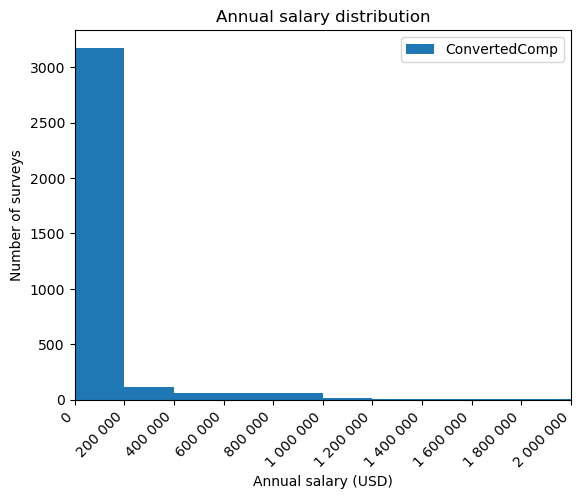

In [7]:
# your code goes here
QUERY = """
SELECT ConvertedComp
FROM master
WHERE ConvertedComp IS NOT NULL

group by ConvertedComp
order by ConvertedComp
""".format(table_name)

def format_thousands(x, pos):
    formatted = "{:,.0f}".format(x)
    return formatted.replace(",", " ")


salaries = pd.read_sql_query(QUERY,conn)
salaries_cleaned = salaries.dropna()  # or salaries.fillna(some_value)

count, bin_edges = np.histogram(salaries_cleaned)
salaries_cleaned.plot(kind='hist', xticks=bin_edges)
plt.xlabel('Annual salary (USD)')
plt.ylabel('Number of surveys')
plt.title('Annual salary distribution')
plt.xlim([salaries_cleaned['ConvertedComp'].min(), salaries_cleaned['ConvertedComp'].max()])
plt.ticklabel_format(axis='x',useOffset=False,style='plain')
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_thousands))
plt.show()

### Box Plots


Plot a box plot of `Age.`


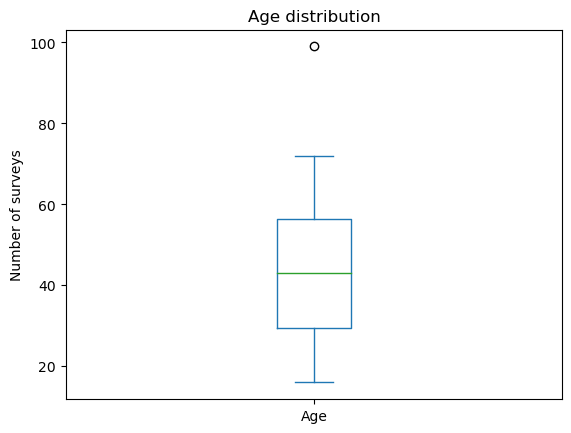

In [8]:
# your code goes here

# your code goes here
QUERY = """
SELECT Age
FROM master
WHERE Age IS NOT NULL

group by Age
order by Age
""".format(table_name)


age = pd.read_sql_query(QUERY,conn)
age_cleaned = age.dropna()  # or salaries.fillna(some_value)

count, bin_edges = np.histogram(age_cleaned)
age_cleaned.plot(kind='box')
plt.ylabel('Number of surveys')
plt.title('Age distribution')
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


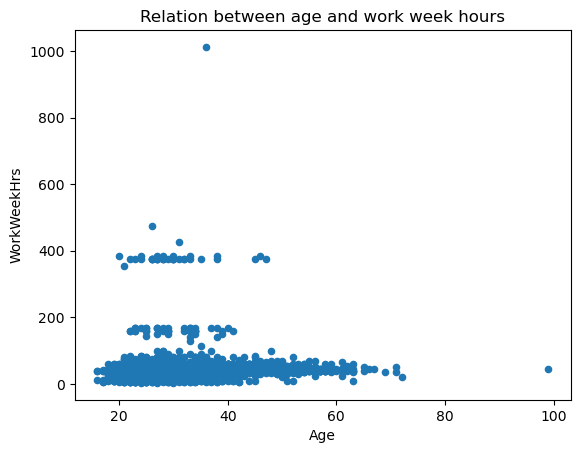

In [10]:
# your code goes here
QUERY = """
SELECT Age,WorkWeekHrs
FROM master
WHERE Age IS NOT NULL AND WorkWeekHrs IS NOT NULL
""".format(table_name)

scatter = pd.read_sql_query(QUERY,conn)

count, bin_edges = np.histogram(scatter)
scatter.plot(kind='scatter',x='Age',y='WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.title('Relation between age and work week hours')
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


<Figure size 1200x600 with 0 Axes>

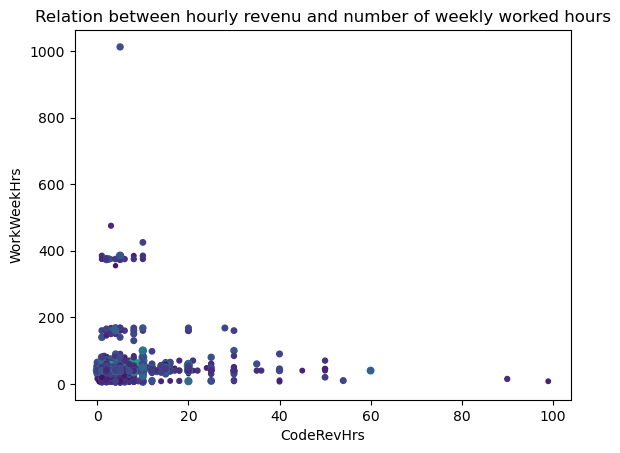

In [11]:
# your code goes here
QUERY = """
SELECT CodeRevHrs,Age,WorkWeekHrs
FROM master
WHERE Age IS NOT NULL AND WorkWeekHrs IS NOT NULL AND CodeRevHrs IS NOT NULL
""".format(table_name)

scatter = pd.read_sql_query(QUERY,conn)

normAge = (scatter['Age'] - scatter['Age'].min()) / (scatter['Age'].mean() - scatter['Age'].min())
fig = plt.figure(figsize=(12,6))
scatter.plot(kind='scatter',x='CodeRevHrs',y='WorkWeekHrs',color=scatter['Age'], s=normAge*10+5)
plt.xlabel('CodeRevHrs')
plt.ylabel('WorkWeekHrs')
plt.title('Relation between hourly revenu and number of weekly worked hours')
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [ ]:
# your code goes here

#Couldn't get the column

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


<Figure size 1200x600 with 0 Axes>

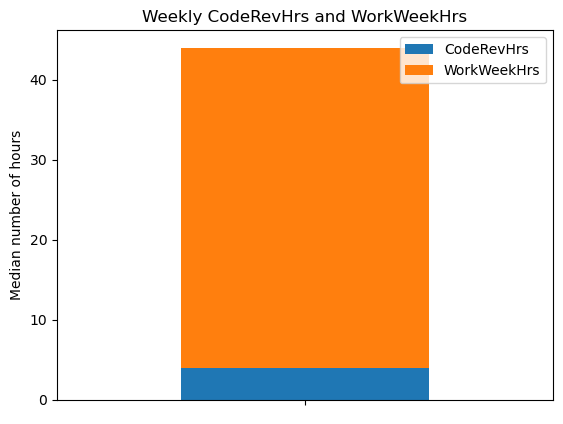

In [20]:
# your code goes here

# your code goes here
QUERY = """
SELECT CodeRevHrs,WorkWeekHrs
FROM master
WHERE Age <=35 AND Age >= 30 AND WorkWeekHrs IS NOT NULL AND CodeRevHrs IS NOT NULL
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
stacked=pd.DataFrame({' ':[df['CodeRevHrs'].median(),df['WorkWeekHrs'].median()]},index=['CodeRevHrs','WorkWeekHrs']).transpose()

fig = plt.figure(figsize=(12,6))
stacked.plot.bar(stacked=True)
plt.ylabel('Median number of hours')
plt.title('Weekly CodeRevHrs and WorkWeekHrs')
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


<Figure size 1200x600 with 0 Axes>

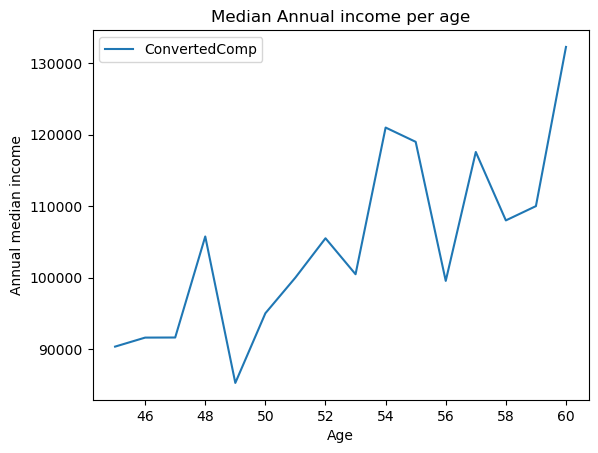

In [34]:

QUERY = """
SELECT Age,ConvertedComp
FROM master
WHERE Age >=45 AND Age <= 60 AND ConvertedComp IS NOT NULL
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
revAge = df.groupby('Age').median()
fig = plt.figure(figsize=(12,6))
revAge.plot(kind="line")
plt.ylabel('Annual median income')
plt.xlabel('Age')
plt.title('Median Annual income per age')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


<Axes: ylabel='MainBranch'>

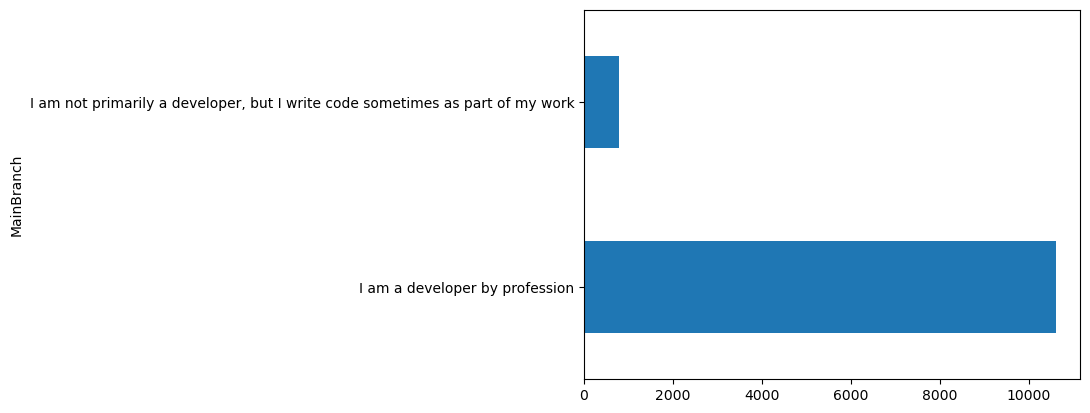

In [42]:
QUERY = """
SELECT MainBranch
FROM master
WHERE MainBranch IS NOT NULL
""".format(table_name)

mainBranch = pd.read_sql_query(QUERY,conn)
mainBranch = mainBranch.groupby('MainBranch')['MainBranch'].count()
mainBranch.plot.barh()

Close the database connection.


In [43]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
